RANDRIAMAHERY Tojoniaina Mamitiana

In [ ]:
pip install --upgrade matplotlib


In [3]:
import matplotlib
print(matplotlib.__version__)


3.10.1


Données chargées :
Fréquences : [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, -15.0, -14.0, -13.0, -12.0, -11.0]
Magnitudes : [4.285460875053104e-14, 4.360806378512988e-14, 9.675982198017628e-14, 6.732832175385806e-14, 9.796578024427955e-14, 4.679744792624881e-14, 7.795024811896167e-14, 15.000000000000025, 6.179777508393273e-14, 7.004310746343475e-15, 6.496002580656634e-14, 8.621409000924366e-14, 1.0810431491176357e-13, 9.26196197256069e-14, 7.732392529699918e-14, 4.5356783236383584e-14, 7.580728093302243e-14, 8.072176536150086e-14, 1.023544345591959e-13, 9.225960014674899e-14]


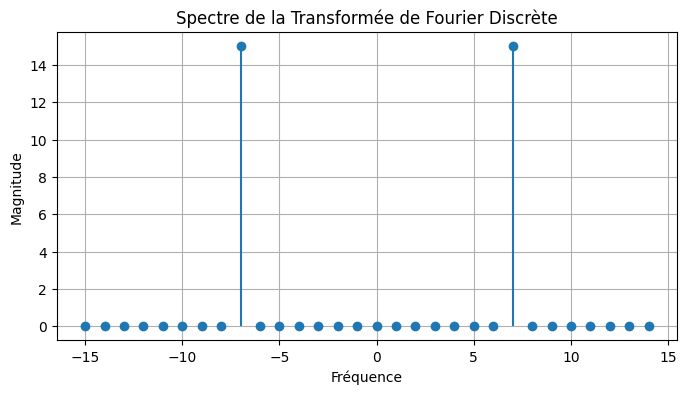

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

def dft(x):
    #Calcule la Transformée de Fourier Discrète (TFD) 
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

N = 30
f0 = 67
n = np.arange(N)
signal = np.sin(2 * np.pi * f0 * n / N)  
X_dft = dft(signal)
freqs = np.fft.fftfreq(N) * N  

#  fichier CSV
csv_filename = "tfd_data.csv"
with open(csv_filename, mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["Fréquence", "Magnitude", "Phase"])
    for k in range(N):
        magnitude = np.abs(X_dft[k])
        phase = np.angle(X_dft[k])
        writer.writerow([freqs[k], magnitude, phase])

# Chargement CSV
freqs_loaded = []
magnitude_loaded = []
phase_loaded = []

with open(csv_filename, mode="r") as file:
    reader = csv.reader(file)
    next(reader)  # Ignorer l'en-tête
    for row in reader:
        freqs_loaded.append(float(row[0]))
        magnitude_loaded.append(float(row[1]))
        phase_loaded.append(float(row[2]))
    print("Données chargées :")
    print("Fréquences :", freqs_loaded[:20])  
    print("Magnitudes :", magnitude_loaded[:20])


# Affichage du spectre
plt.figure(figsize=(8, 4))
plt.stem(freqs_loaded, magnitude_loaded, basefmt=" ")
plt.title("Spectre de la Transformée de Fourier Discrète")
plt.xlabel("Fréquence")
plt.ylabel("Magnitude")
plt.grid()
plt.show()


 - Le spectre de la TFD présente une symétrie autour de la moitié de la fréquence d’échantillonnage.
 - Les fréquences supérieures à N/2 sont des répétitions des basses fréquences
 - La TFD brute est correcte mais inefficace pour de grands signaux.
